# Lab 2 - Measuring time-dependent signals
### PHYS 222, Spring 2024, Dr. Ben Zwickl, Dr. Ke Xu, and Dr. Michael Pierce

### Goals
* **Use the oscillscope and waveform generator to measure a circuit's response**
    * Build and RC circuit
    * Apply square and sine wave signals to the RC circuit.
    * Measure RC time constant
* **Export data from the M2K and import into JupyterHub**
    * Save oscilloscope traces as CSV data files, and examine data structure
    * Import CSV files into Jupyter notebook using `np.genfromtxt()`
    * Plot imported data 
* **Write a function that automates the data import and plotting process**
    * This function will be reused and improved throughout the course. 
* **Make a variable capacitor**
    * Build the circuit
    * Test theoretical relationships 
    * Apply the `load_waveform` function to simplify your experiment.

In [2]:
# load packages at the top of your notebook. 
# We will always use numpy and matplotlib.pyplot.
# In future weeks, you should add these lines yourself

import numpy as np
import matplotlib.pyplot as plt

# Task 1: Build an RC circuit
<img src="Fig_RC_circuit_task_1.png" alt="Diagram for RC circuit" > 
You should produce a waveform similar to this, where Blue (Ch2) is measuring the voltage of the output of the signal generator (W1) at node A and orange (Ch1) is measuring the voltage across the capacitor at node B. 
<img src="Fig_M2K_oscilloscope_screenshot.PNG" alt="Sample waveform" width="500">

1. Build the RC circuit on your breadboard.
1. Use a Signal Generator output (W1, yellow wire) as the voltage source
    * Set to **square wave**. 
    * An amplitude of 1 V is fine
1. Use channel 1 (1+/1-) and channel 2 (2+/2-) of the oscilloscope to simultaneously measure voltages at nodes $A$ and $B$.
1. Save a CSV file ([click here](Fig_M2K_oscilloscope_export.PNG) for screenshot for exporting)
1. Explain what the V/div and s/div settings mean regarding the oscilloscope.
1. Add a photo of your circuit in your OneNote notebok.

**Video Tutorial** on how the [DMM makes capacitance measurements](https://youtu.be/55khE_NY6F0). 

## Viewing your own data
It is a great idea to open your data file as a text file (rather than data) to see how it is structured. Using the Jupyter notebook file navigator, a data file might appear as
![Example data file preview](Text_view_of_data.JPG)

# Task 2: View your own data before importing (2 pt)
Open your saved data as a text file using an app such as Notepad or Notepad++ (Windows) or TextEdit (macOS).

1. What character (e.g., letter/symbol) separates the columns?
1. How many rows is the header (column names and units).
1. How many columns does CSV file have?
1. What are the quantities and units for each of the columns?

In your OneNote notebook, add a screenshot of several rows of the text file and answer those questions. 

## Importing data
Numpy comes with a function `np.genfromtxt()` that we will use to import tables of data into numpy arrays. Once the data is imported into an array, we can do analysis and plotting. The function syntax most relevant to our class is:

```np.genfromtxt(fname, delimiter, skip_header)```

The three function arguments we need most frequently are:
* `fname` must be a string that contains the file name. If the file is in the same directory as the Jupyter notebook you do not need to provide a full path.
* `delimiter` is the character that indicates a division between columns. For .CSV files the delimiter should be a comma but it could be a space or tab sometimes.
* `skip_header` is used to skip rows at the top of the data which are used for column labels and other information. The default value is 0. If you try to import a header row, it will typically fail since header is a string, not a number.

A full list of options can be found at the [official numpy documentation for genfromtxt()](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html).

### Example of np.genfromtxt()

**Run the code to see the output**

In [8]:
# This loads the data from GitHub. Note it must be the "raw" version of the file. Not the "blob" page.

# github path
path = "https://github.com/bzwickl/PHYS222_SP24_Student/raw/main/Lab2/Accelerometer_data_sample.csv"

# import the data
acc_data = np.genfromtxt(path, delimiter=",", skip_header=1)

# print the first 5 rows. Should have 5 columns. 
print(acc_data[0:5]) 

[[ 0.00000000e+00 -1.96212769e-01  7.89642334e-02  8.67877197e+00
   8.68134884e+00]
 [ 2.25830100e-03 -1.81854248e-01  7.65686035e-02  9.20758057e+00
   9.20969454e+00]
 [ 4.57763700e-03 -1.77062988e-01  7.65686035e-02  9.44926453e+00
   9.45123347e+00]
 [ 6.92749000e-03 -1.74682617e-01  6.46057129e-02  9.54736328e+00
   9.54917973e+00]
 [ 9.24682600e-03 -1.72286987e-01  6.46057129e-02  9.58804321e+00
   9.58980862e+00]]


## Plotting data example
Here is an example of using matplotlib for plotting the accelerometer data.

* [Official documentation on Matplotlib's plot() function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) has details on available options. 
* A [list of named colors in Matplotlib](https://matplotlib.org/stable/gallery/color/named_colors.html) can be used to change plot colors to match Scopy.

**Run the code to see the output**

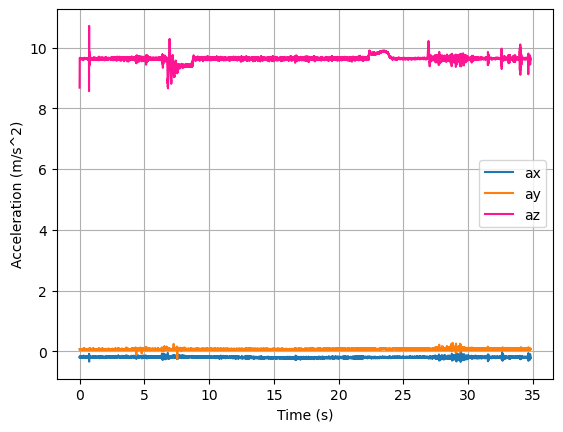

In [6]:
t = acc_data[:,0]  # all rows, first column is time
ax = acc_data[:,1]  # all rows, 2nd column is x-component of acceleration
ay = acc_data[:,2] # all rows, 3rd column is the y-component of acceleration
az = acc_data[:,3] # all rows, 4th column is the z-component of acceleration

plt.plot(t, ax, label="ax")  # use label option to add a label for a legend
plt.plot(t, ay, label="ay")
plt.plot(t, az, label="az", color="deeppink")
plt.legend()  # add legend to the plot
plt.xlabel('Time (s)')  # add x-axis label
plt.ylabel('Acceleration (m/s^2)') # add y-axis label
plt.grid() # add major gridlines

## How to upload and access data from Google Drive
1. **Create a special folder for PHYS 222 in your Google Drive.** Make a sub-folder for each lab.
1. **Upload** a saved data file from Scopy
1. **Mount the Google Drive.** This inserts two lines of code (see cell below) that allow you to open files from your Google Drive within Colab. 
![Screenshot showing where to click to mount the Google Drive](Mounting_google_drive.png)
1. **Give Colab permission** to access Google Drive. It will go through RIT authentication. The process takes 10-20 seconds. 
1. **Locate the file path** under `/content/drive/MyDrive' and navigate to the directory with the file. 
![Screenshot showing how to navigate to your Google Drive](Navigating_Your_Google_Drive.PNG)
1. **Right click on the file** to copy the full path. 
![Screenshot showing how to copy the path of a file](Get_Google_Drive_Path.PNG)
1. **Set a variable named `path` to this pasted value.** Put quotes around the pasted text to ensure it is astring. In my example it becomes 
`path = '/content/drive/Shareddrives/PHYS 222/2024 Spring/Lab Guides/Lab 2/Sample_Scopy_Data.csv'`

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Task 3: Import data and make a plot (2 pts)

1. Upload data to Google Drive and mount the Google Drive
1. Get the path for your uploaded data. 
1. Use `genfromtxt` to import **your own CSV data** from the M2K.
1. Create three separate arrays for time, channel 1, and channel 2
1. Create a plot with axes labels and legend, similar to this one:

![Example Matplotlib Plot of the M2K data](Example_matplotlib_M2K.png)

**Insert cell or cells below to write your code. Copy a screenshot of the working code and output into OneNote.**

# Task 4: Write a function to load an plot the data (2 pts)

Recall the basic syntax for defining a function is 
```
def function_name(parameters):
    """docstring"""
    statement(s)
    return value
```

Here are the specifications for your function

**Function name:** `load_waveform`

**Input parameters:** 
* `filename` - filename for a CSV file saved from the M2K with 2 channels of data

**Output:** 
* **Display a plot of the loaded data** similar to Task 3, including axes labels and legend indicating CH1 and CH2
* **Return** `[t,ch1,ch2]` - a list of 3 arrays representing time, CH1 volts, and CH2 volts

**Use the provided cell below to record your answers**

Run the test cases below for your `load_waveform` function. If the tests pass, the only output will be the plot of the sample data. 

If there are errors, it will identify which `assert` statement generated the error. 

In [ ]:
# RUN THESE TEST CASES BUT DON'T EDIT THEM

### Test cases for load_waveform
path_testdata = "https://github.com/bzwickl/PHYS222_SP24_Student/raw/main/Lab2/Sample_Scopy_Data.csv"
data = load_waveform(path_testdata)
assert len(data) == 3        # make sure the function returns a list of 3 things
t, ch1, ch2 = data            # unpack for analysis
assert len(t) == len(ch1) == len(ch2) == 3200  # check length of imported data set
assert abs(ch1.mean() - -0.0033719303437499894)/-0.0033719303437499894 < 1e-4  # check the values on ch1
assert (np.mean( np.abs(ch2) ) - 0.5011812406249)/ 0.5011812406249 < 1e-4  # check the values on ch2
assert abs( (t.min() - (-0.0016)) ) /abs(-0.0016) < 1e-4   # check the min time

# Task 5: Build and measure a DIY variable capacitor (2 pts, 1 hour)

**Apply your `load_waveform` function to demonstrate how easily you can collect and plot multiple data sets** and speed up your analysis of circuit behavior.

In this task you will build a capacitor using two pieces of aluminum foil and one or more sheets of paper as a spacer. The technique bears some similarity to capacitive touch sensing, but is not identical.

From UP2, you should be familiar with the equation for the capacitance $C$ of a parallel plate capacitor:

$$ C = K \epsilon_0 \frac{A}{d}$$ 

where $A$ is the area of the plates, $d$ is the separation, and $K$ is the "dielectric constant" for the material between the plates. 

**The circuit diagram** should look similar to 

![Circuit diagram for the Aluminum Foil Capacitor](Fig_lab-2-task-5.png)

**An example photo is provided,** but don't base your connections on the photo. Just use the circuit diagram.  Placing a heavy flat object (e.g., a book) on top of the foil-paper-foil assembly will keep it flat.
<img src="DIY_Capacitor_photo.jpg" alt="Photo of Experimental setup for DIY capacitor" width="500">



**Your goals** 
1. **Build a resistor-capacitor circuit** with a DIY parallel plate capacitor. Flatten the capacitor with books. 
1. **Choose** whether you will vary the area $A$ or the spacing $d$. 
1. **Adjust the signal generator frequency and oscilloscope timescale** so you can clearly see the exponential decays. 
1. **Use both CH1 and CH2 to measure the square wave AND the capacitor voltage to trigger on the square wave** to get the time-axis on all the data sets to line up.  (Triggering fixed the t = 0 on the oscilloscope)
1. **Save a three or more data sets** showing how the circuit response varies with the changing $A$ or $d$.
1. **Generate a single plot showing the RC response signal** (rising and falling exponentials) for your different data sets. The plot should show the qualitative trend. In the text or plot legend indicate how you varied the parameter. Call your `load_waveform` function three times within the same cell should create three overlaid plots. 

![Example Task 5 data](Fig_Example_Task5.PNG)

**Need help?** 
* See the [video on the DIY variable capacitor](https://youtu.be/aV78VR-jEyE).
* You may want to place a book on top of the capacitor to keep the plates flat. This is likely to produce more consistent results.

**Use the provided cell below to record your answers**